### 
- Logistic regression is a statistical method that uses data analysis to predict a binary outcome. It's a supervised machine learning algorithm that uses mathematics to find relationships between two data facto

In [2]:
#IMPORT

import pandas as pd
import numpy as np  

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, classification_report, precision_score, f1_score, confusion_matrix

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder, minmax_scale

In [30]:
df= sns.load_dataset('titanic')
df.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [10]:
df["deck"]

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [11]:

    df.drop("deck", axis=1, inplace=True)
#impute 
df['age'].fillna(df['age'].median(), inplace=True)
df["fare"].fillna(df['fare'].median(), inplace=True)

# impute missing values for missing values of embark and embarked town
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
df["embarked"].fillna(df['embarked'].mode()[0], inplace=True)


In [14]:
# Encode object and cateory
for col in df.columns:
    if df[col].dtype== 'object' or df[col].dtype=='category':
        df[col]= LabelEncoder().fit_transform(df[col])

In [16]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [20]:
# X and Y 
X = df.drop('survived', axis=1)
y = df['survived']

In [21]:
#train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
# Predict the model
y_pred = model.predict(X_test)

In [25]:
print('accuracy score: ', accuracy_score(y_test, y_pred))
print('recall score: ', recall_score(y_test, y_pred)) 
print('prediction accuracy: ', precision_score(y_test, y_pred))
print('f1 score: ', f1_score(y_test, y_pred))
print('confusion matrix: ', confusion_matrix(y_test, y_pred))
print('classification report: ', classification_report(y_test, y_pred))


accuracy score:  1.0
recall score:  1.0
prediction accuracy:  1.0
f1 score:  1.0
confusion matrix:  [[114   0]
 [  0  65]]
classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00        65

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Text(95.72222222222221, 0.5, 'Actual')

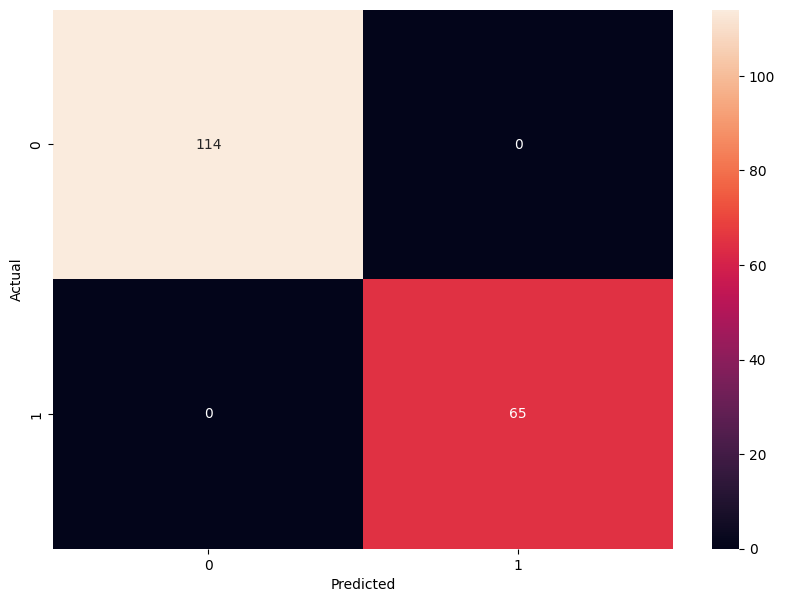

In [28]:
#plot
plt.figure(figsize = (10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred),fmt='d', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [29]:
#save the model
import pickle
pickle.dump(model, open('./Save_Models/02_model.pkl','wb'))

###
- Logistic regression model we learn from the data from calssification and we changed them in numeric values and we see is there any person survided or not